<a href="https://colab.research.google.com/github/giwahana/test_repo/blob/master/agu_python_workshop_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for Satellite Remote Sensing: Analysis and Visualization for Earth Scientists**

Authors: Dr. Rebekah Esmaili (rebekah.esmaili@gmail.com) and Dr. Amy Huff (amy.huff@noaa.gov)

This tutorial was written in December 2024 for the AGU24 Fall Meeting "Pre-Conference Workshop" PREWS3.

<font color='red'>**If you use any of the Python code in Sections 1 or 4 in your research, please credit the NOAA/NESDIS/STAR Aerosols & Atmospheric Composition Science Team.**</font>

---

Topics covered in **Section 1 (Search for & Download Satellite Files)**:
- Access online NOAA and NASA data archives
- Search for available files for a given satellite/sensor/product & date/time
  - NASA Earthdata:
    - [TEMPO Level 3 (gridded) Nitrogen Dioxide (NO2)](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/images/2024/tempo_tropospheric_no2_20241113_scan009_1822.png)
    - [GPM IMERG rain rate](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/images/2024/gpm_imerg_20240401.png)
  - NOAA Open Data Dissemination (NODD) on AWS:
    - [AVHRR Optimum Interpolation Sea Surface Temperature (OISST)](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/images/2024/avhrr_oisst_2020926.png)
    - [NOAA-20 VIIRS Level 3 (gridded) Aerosol Optical Depth (AOD)](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/images/2024/noaa20_viirs_aod_gridded_20200821.png)
- Select & download satellite files
  - [Link to zip file with data files](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/documents/2024a/agu2024_python_workshop_data_files.zip) (back-up only, in case you encounter trouble with downloading files in Section 1)

Topics covered in **Section 2 (Open & Understand Satellite Files)**:
- Understand satellite data filenames
- Open satellite files that are/are not organized using "groups"
- Identify data variables and read their metadata
- Extract data variables
- Process satellite data variables using quality/diagnostic flags

Topics covered in **Section 3 (Simple Plots of Satellite Data)**:
- Check satellite variable & coordinate dimensions and ensure they are consistent
- Make a simple plot of satellite data

Topics covered in **Section 4 (Plotting Satellite Data on a Map)**:
- Set up a figure with a map projection
- Set the geographic domain of the map
- Change the appearance (colors) of borderlines, land & water polygons
- Add latitude/longitude gridlines & labels
- Pull information out of the data file name and use it to automatically make a plot title & name for saved image file



## **More Information on Satellite Data Terminology**

In this tutorial, we will be working with Level 3 (L3 or gridded) satellite data, and we refer to Level 2 (L2 or granule) satellite data. In addition, the VIIRS gridded AOD data file we will use is generated from reprocessed L2 data, while the other products are generated from operational L2 data. And the TEMPO NO2 data are beta-maturity, while the other products are full/validated maturity.

If you aren't familiar with these terms, the NOAA Aerosols and Atmospheric Composition Science Team's [satellite training website](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/index.php) has definitions and examples of:
- [Level 1b, Level 2, and Level 3 satellite data processing levels](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/satellite_data_processing_levels.php)
- [Operational vs. reprocessed data latency](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/satellite_data_operational_reprocessed.php)
- [Beta, Provisional, and Full/Validated product maturity levels](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/satellite_data_maturity_levels.php)

## **Read the Satellite Data Documentation!**

Before working with a satellite product, users should read the product documentation from the science team, such as the users' guide, "readme", or algorithm theoretical basis document (ATBD). These documents provide important information about satellite products, including valid data ranges, data screening using data quality/diagnostic flags, and known issues.

Here are links to documentation for the satellite products used in today's tutorial:

- [TEMPO Trace Gas and Cloud Level 2 and Level 3 Data Products: User's Guide](https://asdc.larc.nasa.gov/documents/tempo/guide/TEMPO_Level-2-3_trace_gas_clouds_user_guide_V1.1.pdf) (September 18, 2024)
-[GPM IMERG V07 Release Notes](https://gpm.nasa.gov/sites/default/files/2024-02/IMERG_V07_ReleaseNotes_240221.pdf) (February 21, 2023)
-[VIIRS Aerosol Optical Depth EDR (granules) User's Guide](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/documents/VIIRS_AOD_Users_Guide.pdf) (February 2020)
  - VIIRS gridded AOD files are generated by gridding high quality AOD EDR (granules) data on a  regular 0.25° x 0.25° equal-angle grid (~28 km x 28 km at the equator), for global coverage
- [OISST ATBD](https://www.ncei.noaa.gov/pub/data/sds/cdr/CDRs/Sea_Surface_Temperature_Optimum_Interpolation/AlgorithmDescription_01B-09.pdf) (September 13, 2013)


## **Section 0: Set up Google Colab**

[Google Colab](https://colab.google/) is a hosted Jupyter Notebook service that requires no setup to use and provides free access to computing resources.

[Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) is an open-source web application that supports >40 programming languages, including Python. It allows code to be broken into “blocks” that run independently, which makes it ideal for learning. Any output from the code in a "block" will appear underneath it.

**The Python code demonstrated in this training is universal**. Specific lines of code or functions will run in any Python IDE (e.g., Spyder, Visual Studio Code), Jupyter Notebook, or the Python interpreter.

###**Example of how to run Jupyter Notebook code blocks**

To see how Jupyter Notebook works, let's run the Python code to print "Hello world!"

Place your cursor over the grey code block below, then click the little black circle with the white arrow inside, located on the far left side of the block.

In [ ]:
print('Hello world!')

### **Limitations of using Google Colab**

Colab is free, powerful, and easy to use, but it has limitations:


1.   **Colab sessions are temporary.** A session will expire after 12 hours of continuous use or after 90 minutes of idle time. <font color='red'>**All output, including downloaded or generated files, will be lost after the session expires.**</font> Therefore, any files users want to save must be downloaded to the user's local computer or Google Drive account.
2.  **Colab cannot be configured to use a virtual or conda environment.** Therefore, in general, users must work with the existing, current Colab configuration.
3. **The Colab configuration changes frequently, with the addition of new packages and updates to existing packages.** So code that runs today may give an error in the future after an update to the Colab configuration.

### **Import Python modules and packages**

- [pathlib](https://docs.python.org/3/library/pathlib.html): module to set file system paths
- [datetime](https://docs.python.org/3/library/datetime.html): module to manipulate dates and times
- [S3Fs](https://s3fs.readthedocs.io/en/latest/): library to set up a file system interface with AWS Simple Storage Service (S3) buckets
- [earthaccess](https://earthaccess.readthedocs.io/en/stable/): library to search for, download, or stream NASA Earth science data
- [Xarray](https://docs.xarray.dev/en/stable/index.html): library to work with labeled multi-dimensional arrays
- [NumPy](https://numpy.org/doc/stable/user/index.html): library to perform array operations
- [Matplotlib](https://matplotlib.org/stable/index.html): library to make plots
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html): library to make maps

Used by `xarray` but not imported:
- [netCDF4](https://unidata.github.io/netcdf4-python/): library to read and write netCDF files

---
---
The Colab configuration does not include the  `earthaccess`, `s3fs`, `netcdf4`, or `cartopy` packages, so they need to be installed.

**Ignore any error messages about package dependency conflicts; they will not impact the training.**

In [ ]:
# Install missing packages in Colab quietly (no progress notifications)
!pip install --quiet earthaccess s3fs netcdf4 cartopy

In [ ]:
# Import modules and packages

from pathlib import Path

import datetime
from datetime import date

import earthaccess

import s3fs

import xarray as xr

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import cartopy.feature as cfeature
from cartopy import crs as ccrs

### **Save a copy of today's Colab Python configuration**

Google updates the Colab package configuration on a monthly basis. If you plan to run today's notebook again in the future, or to use any of the provided code in a script or notebook of your own, you will want to have a record of the packages & their versions used today.

You can install a [Conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) on your local computer with the key packages and their versions to run Python code with the same configuration as today's Colab.

Run the blocks below to:

1.   Print the current version of Python installed in Colab & save it as a text file (`colab_version.txt`)
2.   Print the list of packages and their versions in the current Colab configuration & save them in a text file (`colab_packages.txt`)


In [ ]:
# Find version of Python installed in Colab
!python --version

In [ ]:
# Save installed version of Python to a text file
!python --version > colab_version.txt

In [ ]:
# List all packages & their versions in the Colab configuration
!pip list -v

In [ ]:
# Save list of all installed packages & their versions to a text file
!pip freeze > colab_packages.txt

## **Section 1: Search for & Download Satellite Files**

### **1.1 NASA Earthdata: TEMPO and GPM IMERG Files**

####**1.1.1 Connect to Earthdata Login**

The data archive for TEMPO and GPM IMERG files is [NASA Earthdata](https://search.earthdata.nasa.gov/).

We can connect to [NASA Earthdata Login](https://urs.earthdata.nasa.gov/) using the `earthaccess` package. In this tutorial, we are using the `strategy='interactive'` option so you can manually enter your username and password for your Earthdata Login.

If you don't already have an account with Earthdata, register [here](https://urs.earthdata.nasa.gov/users/new) (it's free!).

Useful `earthaccess` functions covered in this tutorial include:
- [earthaccess.login()](https://earthaccess.readthedocs.io/en/stable/user-reference/api/api/#earthaccess.api.login): authenticates with Earthdata Login credentials
- [earthaccess.search_data()](https://earthaccess.readthedocs.io/en/stable/user-reference/api/api/#earthaccess.api.search_data): queries for dataset granules on NASA Earthdata
- [DataGranule.data_links()](https://earthaccess.readthedocs.io/en/stable/user-reference/granules/granules/#earthaccess.results.DataGranule.data_links): returns the URL link to a granule file
- [earthaccess.download()](https://earthaccess.readthedocs.io/en/stable/user-reference/api/api/#earthaccess.api.download): downloads granules files to local directory

In [ ]:
# Connect to NASA Earthdata Login with user credentials
auth = earthaccess.login(strategy='interactive')

#### **1.1.2 Search NASA Earthdata for TEMPO NO2 Level 3 (gridded) files**

The `earthaccess.search_data()` function has a number of arguments that can be defined to query Earthdata, including `short_name`, `temporal`, `bounding_box`, and `granule_name`. You can use some or all of these parameters to search for satellite data files.

Let's use these search parameters to find the available TEMPO NO2 L3 files spanning the full TEMPO field of regard (FOR) for November 13, 2024. The FOR extends from Mexico City and the Yucatan Peninsula to the Canadian oil sands in the north-south direction, and from the Atlantic Ocean to the Pacific Ocean in the east-west direction. TEMPO scans its FOR from east to west; a full scan takes about 1 hour, with shorter scan times in the morning and evening (~40 minutes).

In [ ]:
# Earthdata search settings

short_name = 'TEMPO_NO2_L3'  # Product abbreviation (string)
observation_start = '2024-11-13 12:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = '2024-11-13 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = (-130, 10, -50, 60)  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S*'  # Wildcard string for scan number (use '*S*' to find all scans)

In [ ]:
# Search NASA Earthdata

results = earthaccess.search_data(short_name=short_name,
                                  temporal=(observation_start, observation_end),
                                  bounding_box=domain,
                                  granule_name=scan_wildcard)

#### **1.1.3 Review NASA Earthdata search results**

Using [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) in conjunction with the the `earthaccess` `DataGranule.data_links()` function, we can print the list of satellite file names returned from the NASA Earthdata search.

---
---

**Pro tip:** When printing directory paths, for simplicity I prefer to print only the final path component using the `str.split` [method](https://docs.python.org/3/library/stdtypes.html#str.split). To see why this is a simpler option, we can also print the full directory path for the first product, for comparison.

In [ ]:
# Print list of available file names

available_files = [(granule.data_links(access="external")) for granule in results]
for available_file in available_files:
    print(available_file[0].split('/')[-1])

In [ ]:
# Print the full directory path for the first product
# For NASA Earthdata, this is a web link

print(available_files[0])

#### **1.1.4 Modify search settings to find file corresponding to Scan 9**

Our initial search returned 13 files for November 13, 2024, corresponding to TEMPO Scans 2 (`S002`) through 14 (`S014`).  

Let's modify the `Earthdata search settings` to search for only Scan 9 (`S009`), and then re-run the code block to `Search NASA Earthdata`.

In [ ]:
# Earthdata search settings

short_name = 'TEMPO_NO2_L3'  # Product abbreviation (string)
observation_start = '2024-11-13 12:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = '2024-11-13 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = (-130, 10, -50, 60)  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S009*'  # Wildcard string for scan number (use '*S*' to find all scans)

In [ ]:
# Search NASA Earthdata

results = earthaccess.search_data(short_name=short_name,
                                  temporal=(observation_start, observation_end),
                                  bounding_box=domain,
                                  granule_name=scan_wildcard)

In [ ]:
# Print list of available file names
# Should be only one file, corresponding to Scan 9 (S009)

available_files = [(granule.data_links(access="external")) for granule in results]
for available_file in available_files:
    print(available_file[0].split('/')[-1])

#### **1.1.5 Download the TEMPO NO2 file for Scan 9 on November 13, 2024**

Use the `earthaccess.download()` function to download the one TEMPO NO2 L3 (gridded) data file. Downloaded files are saved to the Colab instance; click on the `Files` icon in the menu panel on the left side of the Colab window.

---
---


**Pro tip:**  I recommend using the `pathlib` [module](https://docs.python.org/3/library/pathlib.html) to set directory paths because it has a lot of very handy features, including automatically using the correct format for the user's operating system. This helps avoid errors in situations when more than one person is using the same code file, because Windows uses back slashes in directory paths, while MacOS and Linux use forward slashes.

The `pathlib` syntax to set a directory path is `Path('directory_name')`, for example `Path('C:/Users/Jane.Smith/Desktop')`. To set the current working directory, use `Path.cwd()`.

In [ ]:
# Download file from NASA Earthdata

earthaccess.download(results, local_path=Path.cwd())

##### <b><font color="blue" size="5">Exercise 1-1: Search for GPM IMERG rain rate files for April 1, 2024 & download file for the 12:00 UTC scan</b></font>

Fill in the code blocks below, following the same procedure used for the TEMPO NO2 data:

1.  Change the `Earthdata search settings` to search for all of the available IMERG rain rate files for April 1, 2024, as follows:

```
short_name = 'GPM_3IMERGHH'  # Product abbreviation (string)
observation_start = '2024-04-01 00:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = '2024-04-01 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = (180, -90, -180, 90)  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S*'  # # Wildcard string for scan number (use '*S*' to find all scans)
```

2.   Run the code block to `Search NASA Earthdata`.
  - Your search should return 48 files.
  - Check the list of file names with the answers (below).

3. Modify the `Earthdata search settings` to search for **only the 12:00 UTC scan** & re-run the the code block to `Search NASA Earthdata`.
  - Your search should return 1 file.
  - Check the file name with the answers (below).

4.  Run the code block to `Download file from NASA Earthdata`.
  - **You should download 1 file.**
  - Check that the downloaded file appears in the `Files` menu panel.


In [ ]:
# Earthdata search settings

short_name = ''  # Product abbreviation (string)
observation_start = 'YYYY-MM-DD 12:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = 'YYYY-MM-DD 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = ()  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S*'  # Wildcard string for scan number (use '*S*' to find all scans)

In [ ]:
# Search NASA Earthdata

results =

In [ ]:
# Print list of available file names



In [ ]:
# Download file from NASA Earthdata for 12:00 UTC scan on April 1, 2024



<details><summary><b><font color="blue" size=5>Answers to Exercise 1-1</font></b></summary>
<p></p>

```
# Earthdata search settings for all files on April 1, 2024

short_name = 'GPM_3IMERGHH'  # Product abbreviation (string)
observation_start = '2024-04-01 00:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = '2024-04-01 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = (180, -90, -180, 90)  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S*'  # # Wildcard string for scan number (use '*S*' to find all scans)
```

```
# Search NASA Earthdata

results = earthaccess.search_data(short_name=short_name,
                                  temporal=(observation_start, observation_end),
                                  bounding_box=domain,
                                  granule_name=scan_wildcard)
```




---

**List of all of the available IMERG rain rate files for April 1, 2024**

3B-HHR.MS.MRG.3IMERG.20240401-S000000-E002959.0000.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S003000-E005959.0030.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S010000-E012959.0060.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S013000-E015959.0090.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S020000-E022959.0120.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S023000-E025959.0150.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S030000-E032959.0180.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S033000-E035959.0210.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S040000-E042959.0240.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S043000-E045959.0270.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S050000-E052959.0300.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S053000-E055959.0330.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S060000-E062959.0360.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S063000-E065959.0390.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S070000-E072959.0420.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S073000-E075959.0450.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S080000-E082959.0480.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S083000-E085959.0510.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S090000-E092959.0540.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S093000-E095959.0570.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S100000-E102959.0600.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S103000-E105959.0630.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S110000-E112959.0660.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S113000-E115959.0690.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S120000-E122959.0720.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S123000-E125959.0750.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S130000-E132959.0780.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S133000-E135959.0810.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S140000-E142959.0840.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S143000-E145959.0870.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S150000-E152959.0900.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S153000-E155959.0930.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S160000-E162959.0960.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S163000-E165959.0990.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S170000-E172959.1020.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S173000-E175959.1050.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S180000-E182959.1080.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S183000-E185959.1110.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S190000-E192959.1140.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S193000-E195959.1170.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S200000-E202959.1200.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S203000-E205959.1230.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S210000-E212959.1260.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S213000-E215959.1290.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S220000-E222959.1320.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S223000-E225959.1350.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S230000-E232959.1380.V07B.HDF5

3B-HHR.MS.MRG.3IMERG.20240401-S233000-E235959.1410.V07B.HDF5

```
# Modified Earthdata search settings for the 12:00 UTC scan

short_name = 'GPM_3IMERGHH'  # Product abbreviation (string)
observation_start = '2024-04-01 00:00:00'  # Observation start date/time (string): 'YYYY-MM-DD HH:MM:SS'
observation_end = '2024-04-01 23:59:59'  # Observation end date/time (string): 'YYYY-MM-DD HH:MM:SS'
domain = (180, -90, -180, 90)  # Geographic bounding box (integers: W_lon, S_lat,  E_lon, N_lat)
scan_wildcard = '*S1200*'  # # Wildcard string for scan number (use '*S*' to find all scans)
```

---

**IMERG file for the 12:00 UTC scan on April 1, 2024**

3B-HHR.MS.MRG.3IMERG.20240401-S120000-E122959.0720.V07B.HDF5

---


### **1.2 NOAA Open Data Dissemination (NODD): OISST and VIIRS AOD Files**

#### **1.2.1 Connect to NODD on Amazon Web Services (AWS)**
The [NODD Program](https://www.noaa.gov/information-technology/open-data-dissemination) provides public access to NOAA's open data via commercial cloud platforms.

The NODD platform for VIIRS gridded AOD and AVHRR OISST files is Amazon Web Services (AWS). We can connect to AWS using the `s3fs` package with an anonymous connection (`annon=True`). Files on AWS are stored in directories called Simple Storage Service (S3) buckets. The `s3fs` package allows users to access AWS S3 buckets as if they are file system (`fs`) directories.

Useful `s3fs` functions covered in this training include:
- [fs.get()](https://s3fs.readthedocs.io/en/latest/api.html#s3fs.core.S3FileSystem.get): downloads files to local directory
- [fs.ls()](https://s3fs.readthedocs.io/en/latest/api.html#s3fs.core.S3FileSystem.ls): lists file paths (directories & files) at source
- [fs.size()](https://s3fs.readthedocs.io/en/latest/api.html#s3fs.core.S3FileSystem.size): returns the approximate size (in bytes) of the file

**You do not need an AWS cloud computing account to access NOAA data!** Think of the NODD on AWS as a data archive that just happens to be in the cloud instead of hosted on a physical server.

In [ ]:
# Connect to AWS S3 anonymously
fs = s3fs.S3FileSystem(anon=True)

#### **1.2.2 Navigating the NODD S3 buckets on AWS**

Each NOAA program has its own S3 buckets for NODD data. The NODD also has a web interface, which allows users to easily see the organizational structure for the various S3 buckets. Data files can be downloaded manually via the web interface.

The NOAA Oceanic Climate Data Records (CDRs) program includes the AVHRR OISST data:
- [NODD on AWS Oceanic CDRs homepage](https://registry.opendata.aws/noaa-cdr-oceanic/)
- OISST S3 bucket name: `noaa-cdr-sea-surface-temp-optimum-interpolation-pds`
- OISST S3 bucket [web interface](https://noaa-cdr-sea-surface-temp-optimum-interpolation-pds.s3.amazonaws.com/index.html)

The NOAA Joint Polar Satellite Series (JPSS) program includes the VIIRS gridded AOD data:
- [NODD on AWS JPSS homepage](https://registry.opendata.aws/noaa-jpss/)
- JPSS Development Data S3 bucket name: `noaa-jpss`
- JPSS Development Data S3 bucket [web interface](https://noaa-jpss.s3.amazonaws.com/index.html)


---

Find a specific data file on the NODD by setting the full S3 bucket directory path to the file; for example:

`noaa-cdr-sea-surface-temp-optimum-interpolation-pds/data/v2.1/avhrr/202409/oisst-avhrr-v02r01.20240926.nc`

`noaa-jpss/NOAA20/VIIRS/NOAA20_VIIRS_Aerosol_Optical_Depth_Gridded_Reprocessed/0.25_Degrees_Daily/2020/viirs_eps_noaa20_aod_0.250_deg_20200821.nc`

#### **1.2.3 Browse the AVHRR OISST S3 bucket**

To find the full S3 bucket directory paths to OISST files, we start by browsing the top organizational level of the AVHRR OISST S3 bucket; these are subdirectories labeled with the 6-digit year and month of the observations, in the format `YYYYMM`.

Use the  `fs.ls()` function to find the available product subdirectory year-month paths in the OISST S3 bucket.

In [ ]:
# Find & print the subdirectory paths in the S3 bucket

year_months = fs.ls('noaa-cdr-sea-surface-temp-optimum-interpolation-pds/data/v2.1/avhrr/')

for year_month in year_months:
  print(year_month.split('/')[-1])

#### **1.2.4 Find all of the OISST files for September 2024**

Let's define a `data_path` variable to set the directory path for AVHRR OISST files for September 2024, and then use the `fs.ls()` function to list the full path names for the individual data files.

**Coding Note:** The `fs.ls()` function takes the source directory path argument `data_path` as a string, which is why the  `year` and `month` variables, entered as integers, are converted to strings. The Python `str.zfill(width)` [method](https://docs.python.org/3/library/stdtypes.html#str.zfill) ensures the `month` string in the `data_path` is 2 digits; `str.zfill(width)` returns a copy of the string left-filled with ASCII '0' digits to make a string of length `width`. This way, the `data_path` syntax is correct for `month` variable integers <10.

In [ ]:
# Find all the OISST files for September 2024
# Print total number of files in directory & first 10 file names

bucket = 'noaa-cdr-sea-surface-temp-optimum-interpolation-pds/data/v2.1/avhrr/'
year = 2024
month = 9

data_path = (bucket + str(year) + str(month).zfill(2) + '/')

files = fs.ls(data_path)

print('Total number of files:', len(files), '\n')

for file in files[:10]:
    print(file.split('/')[-1])

In [ ]:
# Print the full directory path for the first data file

files[0]

#### **1.2.5 Select the OISST file for September 26, 2024**

Most satellite file names contain information about the observation date and, if relevant, observation times. You will learn more about filename conventions in Section 2.

Using Python [slicing](https://stackoverflow.com/questions/509211/how-slicing-in-python-works) and [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions), we can select OISST file paths on the S3 bucket using the observation date in `YYYYMMDD` format in the file names.

Let's select the file corresponding to September 26.

---
---

**Pro tip**: Before downloading, I recommend printing the selected satellite file names to confirm they are the files you want, and checking the approximate size of each file using the `fs.size()` function.


In [ ]:
# Select the file for September 26, 2024

matches = [file for file in files if (file.split('/')[-1].split('.')[1][6:9] == '26')]

# Print file name and approximate file size
for match in matches:
  print(match.split('/')[-1])
  print('Approximate file size (MB):', round((fs.size(match)/1.0E6), 2))

#### **1.2.6 Download the selected OISST file**

Use the `fs.get()` function to download the one OISST file corresponding to the selected file directory path (`matches`). Downloaded files are saved to the Colab instance; click on the `Files` icon in the menu panel on the left side of the Colab window.

**Coding Notes:** The `pathlib` module uses `/` to join the directory path with the file name to get the full path for the file, e.g., `Path.cwd() / match.split('/')[-1]`.  The `fs.get()` [function](https://s3fs.readthedocs.io/en/latest/api.html#s3fs.core.S3FileSystem.get) takes the downloaded file directory argument as a string, so the `pathlib` `PurePath.as_posix()` [method](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.as_posix) is used to return a string representation of the full path (with forward slashes) for the downloaded file.

In [ ]:
# Download file from AWS NODD

for match in matches:
    fs.get(match, (Path.cwd() / match.split('/')[-1]).as_posix())

##### <b><font color="blue" size="5">Exercise 1-2: Search for NOAA-20 VIIRS gridded AOD files (daily at 0.250° resolution) for 2020</b></font>


1.  Fill in the missing code in the block below, to find all of the VIIRS gridded AOD files (daily at 0.250° resolution) for 2020.

2.  Run the code block to print the total number of files in the directory and the first 10 file names.
  - Your search should return 366 files.
  - Check the list of the first 10 file names with the answers (below).




In [ ]:
# Find all the NOAA-20 VIIRS gridded AOD files (daily at 0.250° resolution) for 2020
# Print total number of files in directory & first 10 file names

bucket = 'noaa-jpss/NOAA20/VIIRS/NOAA20_VIIRS_Aerosol_Optical_Depth_Gridded_Reprocessed/'
resolution = '0.25_Degrees_Daily/'
year =

data_path = ()

files = fs.ls()

print('Total number of files:', len(files), '\n')

for


<details><summary><b><font color="blue" size=5>Answers to Exercise 1-2</font></b></summary>
<p></p>

```
# Find all the VIIRS gridded AOD files (daily at 0.250° resolution) for 2020
# Print total number of files in directory & first 10 file names

bucket = 'noaa-jpss/NOAA20/VIIRS/NOAA20_VIIRS_Aerosol_Optical_Depth_Gridded_Reprocessed/'
resolution = '0.25_Degrees_Daily/'
year = 2020

data_path = (bucket + resolution + str(year) + '/')

files = fs.ls(data_path)

print('Total number of files:', len(files), '\n')

for file in files[:10]:
    print(file.split('/')[-1])
```
---

Total number of files: 366

viirs_eps_noaa20_aod_0.250_deg_20200101.nc

viirs_eps_noaa20_aod_0.250_deg_20200102.nc

viirs_eps_noaa20_aod_0.250_deg_20200103.nc

viirs_eps_noaa20_aod_0.250_deg_20200104.nc

viirs_eps_noaa20_aod_0.250_deg_20200105.nc

viirs_eps_noaa20_aod_0.250_deg_20200106.nc

viirs_eps_noaa20_aod_0.250_deg_20200107.nc

viirs_eps_noaa20_aod_0.250_deg_20200108.nc

viirs_eps_noaa20_aod_0.250_deg_20200109.nc

viirs_eps_noaa20_aod_0.250_deg_20200110.nc


#### **1.2.7 Select the NOAA-20 VIIRS gridded AOD file for August 21, 2024**

Like we did with the OISST files, we can select the VIIRS gridded AOD file paths on the S3 bucket using the observation date in `YYYYMMDD` format in the file names.

Let's select the file corresponding to August 21, print the file name and the approximate size of the file.


In [ ]:
# Select the file for August 21, 2020

matches = [file for file in files if (file.split('/')[-1].split('_')[6][4:8] == '0821')]

# Print file name and approximate file size
for match in matches:
  print(match.split('/')[-1])
  print('Approximate file size (MB):', round((fs.size(match)/1.0E6), 2))

#### **1.2.8 Download the selected AOD file**

Like we did with the OISST file, use the `fs.get()` function to download the one AOD file corresponding to the selected file directory path (`matches`). Downloaded files are saved to the Colab instance; click on the `Files` icon in the menu panel on the left side of the Colab window.

In [ ]:
# Download file from AWS NODD

for match in matches:
    fs.get(match, (Path.cwd() / match.split('/')[-1]).as_posix())

## **Section 2: Open & Understand Satellite Files**

### **2.1 Filenames Conventions**

NetCDF and HDF are [self-describing formats](https://ntrs.nasa.gov/api/citations/20120008476/downloads/20120008476.pdf), which are structured binary data files. These formats are community standards for Earth Science because they:

1. Are faster to read when dealing with binary-based datasets compared to text formats
2. Are compact files and thus cost-effective for long-term data storage
3. Include metadata that provides information about the data source and the available variables

NetCDF files are a type of HDF file, they share many of the same tools and workflows to read, extract, and write.

In Section 1, we downloaded four files that we will work with:

* TEMPO gridded NO2
* GPM IMERG rain rate
* VIIRS gridded Aerosol Optical Depth (AOD)
* AVHRR Optimum Interpolation Sea Surface Temperature (OISST)

Many environmental dataset names are quite long and can vary in structure when produced by different organizations. However, the filenames follow similar conventions and contain useful information about their contents. For instance, the following filename is from the VIIRS Level 2 (granule) AOD product from the NOAA JPSS program:

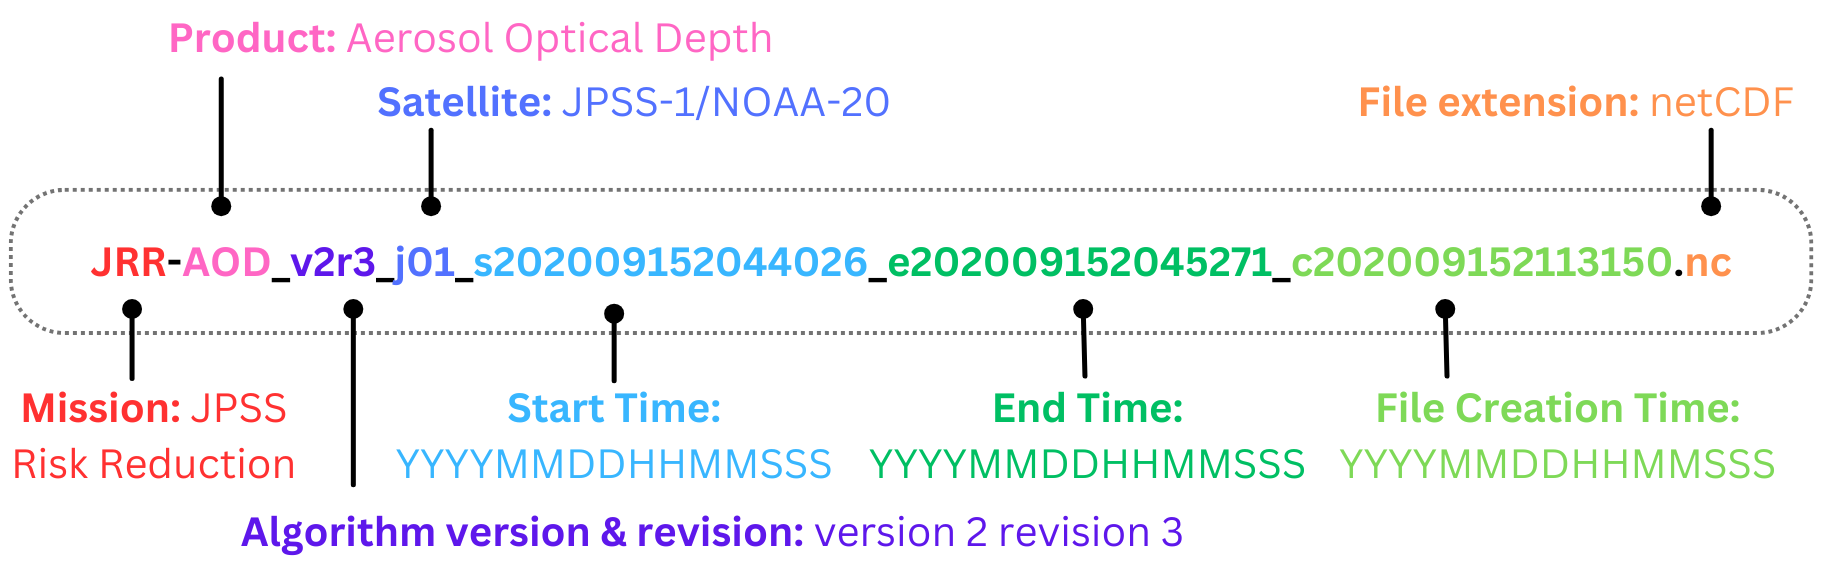


```
JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150.nc
```

* Prefix indicates the mission (`JRR` for JPSS Risk Reduction)
* Product (`AOD` for Aerosol Optical Depth)
* Algorithm version and revision number (`v2r3` for version 2 revision 3)
* Satellite source (`j01` for JPSS-1/NOAA-20)
* Start (`s`), end (`e`), and creation (`c`) time, `YYYYMMDDSSS`(seconds are to one decimal place) in UTC
* The extension `.nc` means that it's a NetCDF file

According to the start and end `HHMM`, file begin at `20:44` and ends at `20:45`, it's roughly a one-minute scan (85 seconds).

Let's explore another file. This file was generated by NASA and has a different filename system, but follows similar conventions:

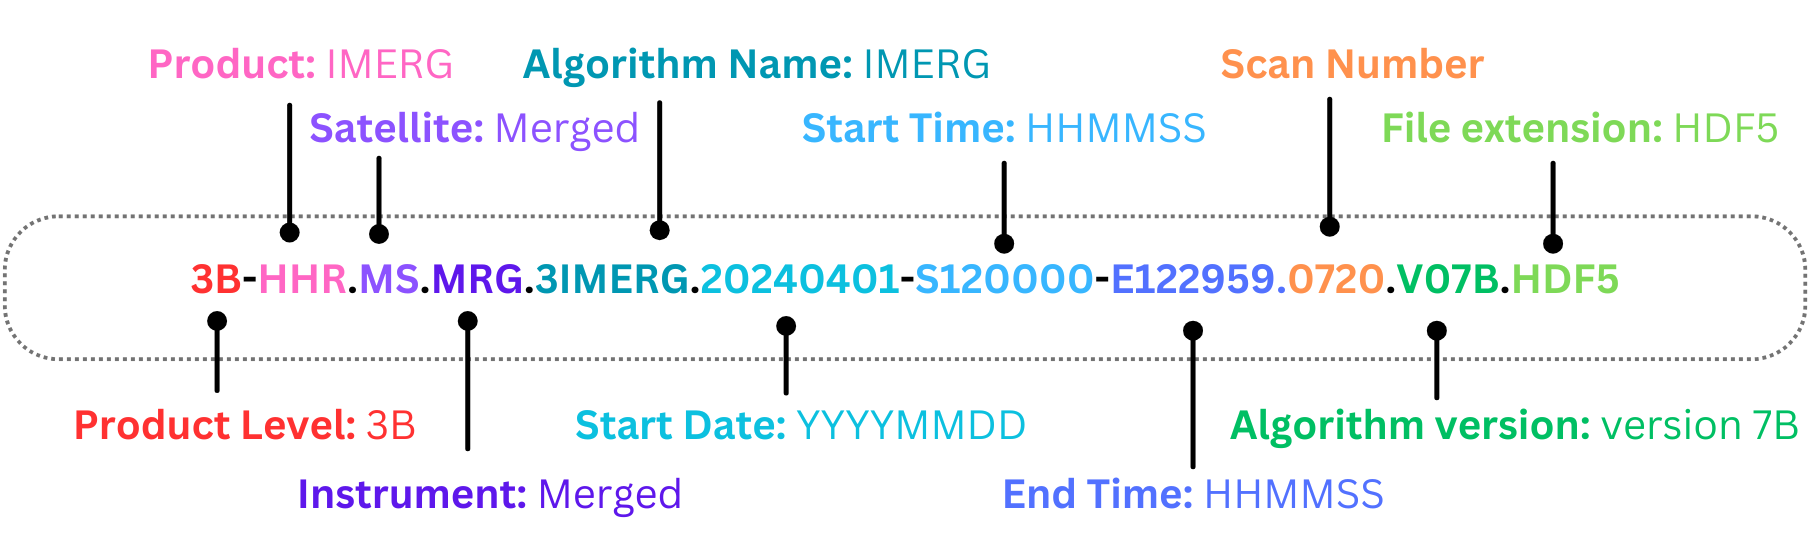


```
3B-HHR.MS.MRG.3IMERG.20240401-S120000-E122959.0720.V07B.HDF5
```

* Prefix indicates that this is a Level 3B (`3B`) and half-hourly dataset (`HRR`). `MS` is for multi-satellite, `MRG` is multi-instrument
* `3IMERG` is for Level 3 IMERG, which is the algorithm name
* The calendar date is in `YYYYMMDD` format (`20240401`)
* The start time (`S`) is `120000` for 12:00:00 in UTC
* The end time (`E`) is `122959` for 12:29:59 in UTC
* The version number is `.V07B` for version 7b
* The extension `.HDF` indicates an HDF file

You can learn more about the [Precipitation Product File Naming Convention Document](https://gpm.nasa.gov/sites/default/files/2020-02/FileNamingConventionForPrecipitationProductsForGPMMission.pdf).

#### <b><font color="blue" size="5">Exercise 2-1: Understanding filenames</b></font>

For the file:

```
oisst-avhrr-v02r01.20240901.nc
```

1. What does `v02r01` refer to?
2. What is the algorithm name?
3. What sensor does this dataset use?

For the file:

```
TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc
```

4. What sensor does this dataset use?
5. What is the format of the date in the filename?
6. If you don't know the filename structure where can you go to learn more?
---

Your Answer:


<details><summary><b><font color="blue" size=5>Answers to Exercise 2-1</font></b></summary>
<p></p>


```
oisst-avhrr-v02r01.20240901.nc
```

1. What does `v02r01` refer to?

<font color="blue">Algorithm version 2, revision 1</font>

2. What is the algorithm name?

<font color="blue">OISST</font>

3. What sensor does this dataset use?

<font color="blue">AVHRR</font>

For the file:

```
TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc
```

4. What instrument is this from?

<font color="blue">TEMPO</font>

5. What is the format of the date in the filename?

`YYYYMMDD` which is separated with a `T` followed by `HHMMSS`. The Z indicated "Zulu" or UTC. </font>

6. If you don't know the filename structure, how can you go to find out?

<font color="blue">Google! You can find "Level 2" and "Level 3" product user guides, READMEs, Algorithm Theoretical Basis Documents (ATBDs) at NASA, NOAA, EUMETSAT, JAXA, etc. for technical information about the data. </font>

[TEMPO Trace Gas and Cloud Level 2 and Level 3 Data Products: User's Guide](https://asdc.larc.nasa.gov/documents/tempo/guide/TEMPO_Level-2-3_trace_gas_clouds_user_guide_V1.1.pdf)

### **2.2 Opening NetCDF files**

We can use the [xarray](http://xarray.pydata.org/en/stable/io.html) package to open self-describing formats and work with large, nested arrays. The [h5netcdf](https://github.com/h5netcdf/h5netcdf) reader engine is useful because it can open `netcdf4` and `HDF` files. Other useful support packages are the [netcdf4](https://unidata.github.io/netcdf4-python/) and [h5py](https://www.h5py.org/) packages.


Use the `xr.open_dataset()` function to import the above dataset. The engine option (`engine=<name>`) is used to read the files. Some possible file readers are `netcdf4`, `scipy`, `pydap`, `h5netcdf`, `pynio`, `cfgrib`, `pseudonetcdf`, `zarr` but you also must have the packages installed.

Note: If you need to get the path of the file in Google Colab, you can click on the `Files` folder icon on the left, and right click on the file of interest, and then select "Copy Path."

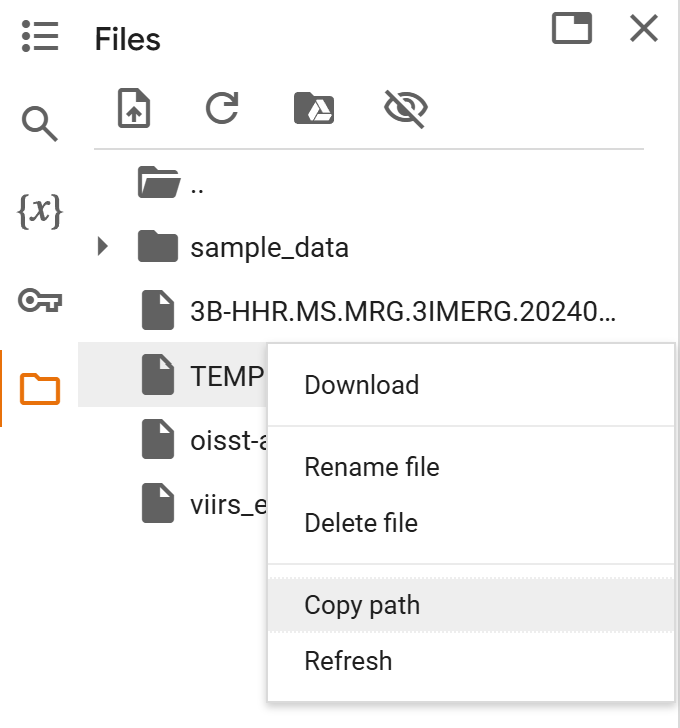

In [ ]:
fname='/content/viirs_eps_noaa20_aod_0.250_deg_20200821.nc'
noaa20_viirs_aod_file_id = xr.open_dataset(fname, engine='h5netcdf')

Printing `noaa20_viirs_aod_file_id` will reveal a long list of the variables, dimensions, indices, and global attributes:

In [ ]:
noaa20_viirs_aod_file_id

The output above is interactive - click on the arrows to show the metadata for:

* __Dimensions__: The dimensions are named `lon` and `lat`, which are respectively 1440 and 720.

* __Coordinates__: The coordinates are `lon` and `lat`. These have the same name as the dimensions, but this is not always true.

* __Variables__: This file contains several variables, we'll use `AOD550`. It's dimensions are also lat and lon.

* __Attributes__: netCDF4 [CF-1.5 conventions](https://cfconventions.org/). Some of the information that we saw in the file name is also present: this product is the "NOAA Enterprise L3 Aerosol Optical Depth" (`title`) it's a NOAA Level 3 product (`processing_level`) and the data was collected from the NOAA-20 (`satellite_name`) VIIRS instrument (`instrument_name)`.

Always inspect netCDF file header contents when working with new data.

### **2.3 Opening NetCDF files that have 'Groups'**

Let's look at a dataset that has column totals of nitrogen dioxide (NO2) in the troposphere. NO2 is a harmful air pollutant.

We'll open the `TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc`, inspect the header, and find the `vertical_column_troposphere` variable.

In [ ]:
fname='/content/TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc'
tempo_no2_file_id = xr.open_dataset(fname, engine='h5netcdf')
tempo_no2_file_id

In the file above, we can find the dimensions (`longitude` and `latitude`) and coordinates, but there is one data variable (`weight`) but `vertical_column_troposphere` is not listed. That does not mean that data are not in the file, but may be inside a [group](https://docs.xarray.dev/en/stable/user-guide/terminology.html#term-Group). Groups are a commonly used organizational structure in HDF, NetCDF, and Zarr formats.

Some files use a nested [group structure](https://docs.h5py.org/en/stable/high/group.html) to organize their variables, which is also called a [DataTree](https://docs.xarray.dev/en/stable/user-guide/terminology.html#term-DataTree). Groups are also called [subtrees](https://xarray-datatree.readthedocs.io/en/latest/terminology.html#term-Subtree).

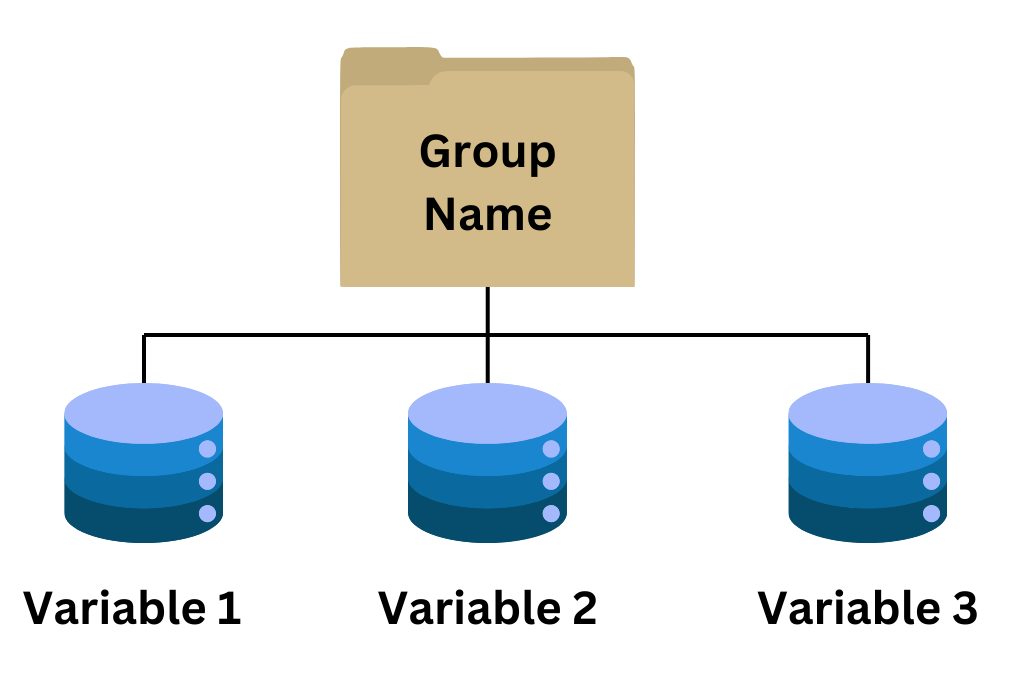

We can open the groups, but we will need to open the file as a [data tree](https://docs.xarray.dev/en/stable/generated/xarray.open_datatree.html#xarray-open-datatree) and use the syntax `xr.open_datatree()`. The syntax looks similar to `xr.open_dataset()`:

In [ ]:
fname='/content/TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc'
tempo_no2_file_id = xr.open_datatree(fname, engine='h5netcdf')
tempo_no2_file_id

In the output above, you will see there are four groups (`products`, `qa_statistics`, `geolocation`, and `support_data  `). You can also print them as a list using `.groups`:

In [ ]:
tempo_no2_file_id.groups

The `vertical_column_troposphere` is contained in the `product` group. You can confirm this by inspecting the contents of the group:

In [ ]:
tempo_no2_file_id['/product']

Now you can see the `vertical_column_troposphere` variable is in the file, we can begin extracting the data we need to make a plot.

### **2.4 Extracting Data**

Now that we have inspected the file, we can begin extracting the `latitude`, `longitude`, and `vertical_column_troposphere` variables. Once extracted, we can perform analysis and make plots with the data.

The syntax for extracting variables that aren't in a group is just the variable name:

```
"<variable name>"
```

The `latitude` and `longitude` are outside of the group, so we use the following syntax:

In [ ]:
tempo_no2_lat = tempo_no2_file_id['latitude']
tempo_no2_lon = tempo_no2_file_id['longitude']

To extract the tropospheric column total NO2, we reference the full path of the group and variable using the following syntax:

```
"<group name>/<variable name>"
```

Below we extract the variable `vertical_column_troposphere` from the `product` group:

In [ ]:
tempo_no2_vc_trop = tempo_no2_file_id['/product/vertical_column_troposphere']

Let's print column total NO2 (`tempo_no2_vc_trop`) below:

In [ ]:
tempo_no2_vc_trop

The `xarray` package uses `numpy` as a dependency so we can use many of the numpy functions like `.mean()`. You can confirm this fact if you check the type of `tempo_no2_vc_trop.values`. Below, you can see the type is `numpy.ndarray.`

In [ ]:
type(tempo_no2_vc_trop.values)

Xarray handles missing data automatically - that is, if we do statistics on arrays with `nan` values in them, they will be ignored implicitly:

In [ ]:
# Check if there are any nan values
print(np.isnan(tempo_no2_vc_trop).any())

# Compute the average
avgNO2 = np.mean(tempo_no2_vc_trop)
print(avgNO2)

Also, let's check the dimensions. Are they the same as the latitude and longitude size? If not, we have to address this when we make plots.

In [ ]:
tempo_no2_vc_trop.shape, tempo_no2_lat.shape, tempo_no2_lon.shape

#### <b><font color="blue" size="5">Exercise 2-2: Importing an HDF5 file</b></font>

1. Open the IMERG file using the xarray library using `xr.open_datatree()`, save as `gpm_imerg_file_id`
2. Are there any groups? If yes, what are their name(s)?
3. Print the variable names - what are the coordinate names?
3. What are the dimensions of the `latitude` and `longitude` coordinates?
---

Your Answer:

<details><summary><b><font color="blue" size=5>Answers to Exercise 2-2</font></b></summary>
<p></p>

1. Open the file
```
fname='/content/3B-HHR.MS.MRG.3IMERG.20240401-S120000-E122959.0720.V07B.HDF5'
gpm_imerg_file_id = xr.open_datatree(fname, engine='h5netcdf')
gpm_imerg_file_id
```
2. Yes there is one group (`Grid`)

3. The coordinates are `lat`, `lon`, and `time`. You can find them in the `'/Grid'` group.
```
gpm_imerg_group_id = gpm_imerg_file_id['/Grid']
gpm_imerg_group_id
```

4. The `lat` and `lon` coordinates are 1800 and 3600, respectively.


### **2.5 Processing Data using Quality/Diagnostic Flags**

Many satellite data files - especially L2 files - include data quality flags or diagnostic flags. These flags are used to screen out satellite observations with known errors or uncertainty (e.g., clouds, sunglint) or select pixels with specific characteristics (e.g., over land, over water).

**The onus is on you as the satellite data user to correctly process satellite variables using quality/diagnostic flags.** How do you know what processing is required, and what quality/diagnostic flags to use?  **You must read the satellite product documentation provided by the science team!!**

In this tutorial, the only satellite product that requires processing is the TEMPO gridded (L3) NO2 data.

#### **2.5.1 Required processing of TEMPO gridded NO2 data**

From reading the [TEMPO Trace Gas and Cloud Level 2 and Level 3 Data Products: User's Guide](https://asdc.larc.nasa.gov/documents/tempo/guide/TEMPO_Level-2-3_trace_gas_clouds_user_guide_V1.1.pdf)  (p. 17-18), we know that we need to apply the following processing to the TEMPO NO2 L3 data variables:
- Set `product/main_data_quality_flag` == 0
- Exclude pixels with `support_data/eff_cloud_fraction` > 0.2

Let's read in the two flag variables we need.

In [ ]:
tempo_main_data_qf = tempo_no2_file_id['/product/main_data_quality_flag']
tempo_eff_cloud_frac = tempo_no2_file_id['/support_data/eff_cloud_fraction']

Let's print the flag variables below:

In [ ]:
tempo_main_data_qf

In [ ]:
tempo_eff_cloud_frac

We can use the `xarray.DataArray.where()` [function](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html) to select the tropospheric column NO2 (`tempo_no2_vc_trop`) pixels that have `tempo_main_data_qf == 0` and `tempo_eff_cloud_frac < 0.2`.

In [ ]:
processed_no2 = tempo_no2_vc_trop.where((tempo_main_data_qf == 0) & (tempo_eff_cloud_frac < 0.2))

Notice that the average of the processed NO2 (below) is less than that of the original, unprocessed NO2 you calculated previously. This is because the pixels in the original NO2 DataArray that have `tempo_main_data_qf != 0` and `tempo_eff_cloud_frac > 0.2` were screened out.

**You should use the `processed_no2` variable for analysis and plotting!!!**

In [ ]:
# Compute the average of the processed NO2

processed_avgNO2 = np.mean(processed_no2)
print(processed_avgNO2)

Now that we know how to import & process multidimensional data, you will make some plots in the next section.

## **Section 3: Simple Plots of Satellite Data**

In the homework, we made line and scatter plots from tabular data. The `Matplotlib` package also supports plotting spatial datasets. However, we often have to do perform several array operations to ensure the `x`, `y`, and `z` coordinates are the same shape. Let's work with GPM IMERG dataset in the next example and make a 3D plot.

### **3.1 Ensuring Consistent Variable Dimensions**



From Exercise 2-1, we learned that this file only contains one group (`Grid`). We can open the group directly so that we don't have to add `'/Grid'` every time we want to access a variable inside that group.

In [ ]:
gpm_imerg_group_id = gpm_imerg_file_id['/Grid']
gpm_imerg_group_id

From the printed information above, we can see the following:

* __Dimensions__: The dimensions are named `time`, `lon`, and `lat`, which each have the size of 1, 3600, and 1800.

* __Coordinates__: Are also `time`, `lon`, and `lat`

* __Variables__: Has seven variables, we'll examine `precipitation` in this lesson.

Let's import the rain rate (`precipitation`). We also need `lat` and `lon` to know where the data are.

In [ ]:
gpm_imerg_rr = gpm_imerg_group_id['precipitation']
gpm_imerg_lat = gpm_imerg_group_id['lat']
gpm_imerg_lon = gpm_imerg_group_id['lon']

Let's inspect the shape and see if the data are already formatted for plotting:

In [ ]:
gpm_imerg_lat.shape, gpm_imerg_lon.shape, gpm_imerg_rr.shape

At this point, we can make a simple plot of the rain rates using [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow) from matplotlib. Because the dimensions are `(time, lon, lat)`, we can remove time by subsetting the data using the syntax `[0,:,:]`. We will use the first (and only) time index and keep all the `lon` and `lat` data We'll set the min and max values to 0 and 2 using `vmin` and `vmax`.

In [ ]:
plt.figure()
plt.imshow(gpm_imerg_rr[0,:,:], vmin=0, vmax=2)
plt.show()

A problem with the above plot is that we do not know where these data are located - for that we need to plot the data with the `lat` and `lon` coordinates.

Mesh plots, such as [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html), are useful for plotting 3D data. Creating a mesh requires that the `X`, `Y`, and `Z` variables have the same 2D shape.

The `.shapes` illustrate that the data all have different shapes. Here are the steps to address this:
1. `gpm_imerg_rr` has a time dependency, which the latitude and longitude don't. We'll need to reduce this to 2D data.
2. `gpm_imerg_lat` and `gpm_imerg_lon` are 1D. We can use `np.meshgrid()` to project the 1-dimensional x and y coordinates into two dimensions

The first problem can be solved by using the xarray `.isel` [function](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.isel.html#xarray.DataArray.isel) to select the only available timestep. The index for this is `0`.

In [ ]:
gpm_imerg_rr = gpm_imerg_rr.isel(time=0)
gpm_imerg_rr

The `np.meshgrid` function will help with problem #2 above. The function is a little confusing at first, so let's start with a simple example. Suppose you have two simple, 1D arrays:

In [ ]:
old_x = [1,2]
old_y = [3,4,5]

`old_x` has two elements and `old_y` has three. If you create a mesh of the two variables, there will be two variables, both with 2 rows and 3 columns:

In [ ]:
new_x, new_y = np.meshgrid(old_x, old_y, indexing='ij')
print(new_x)
print(new_y)

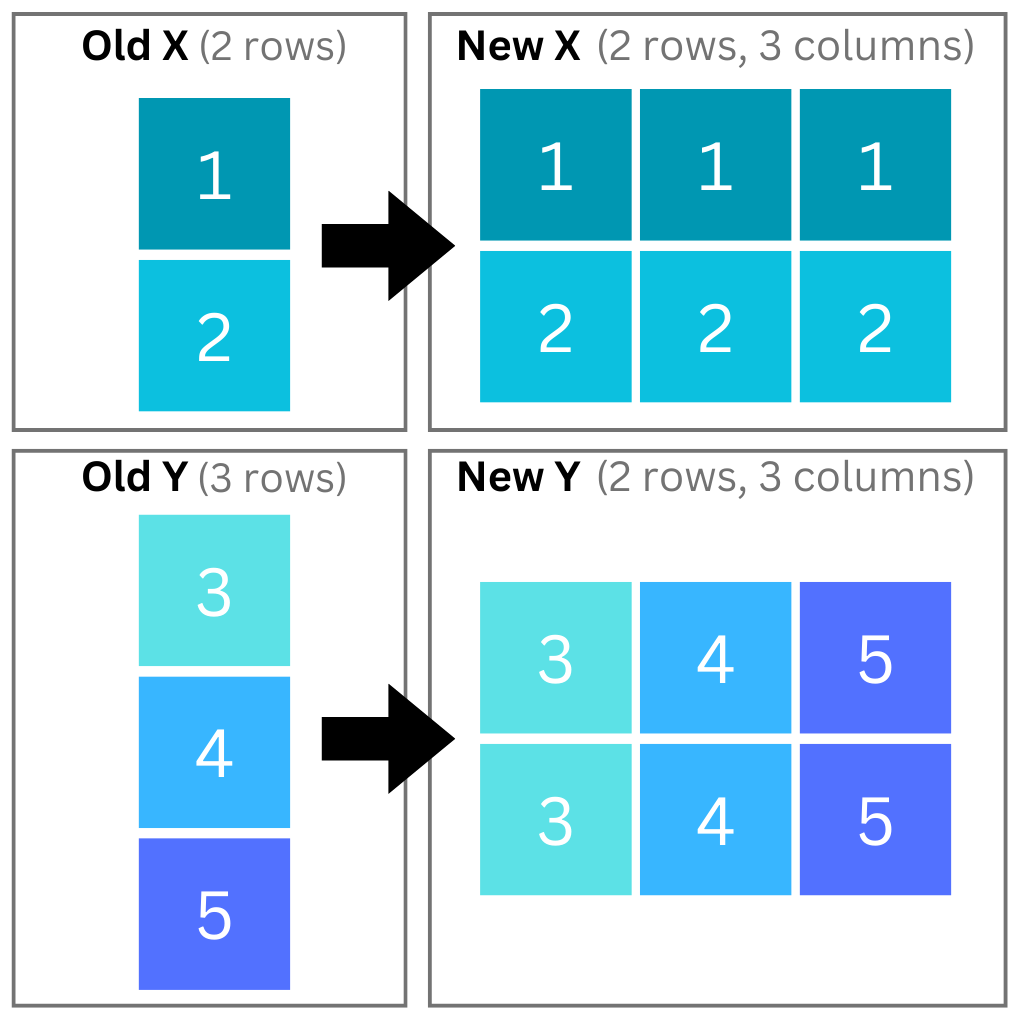

The image above depicts how the resulting mesh will look like.

We strongly recommend using the `indexing='ij'` option. This will yield arrays with dimensions in the same order that the indexes are passed into `np.meshgrid()`.

For example:
* Dim `old_x` --> `2`
* Dim `old_y` --> `3`

Dim `new_x`, `new_y` --> `(2,3)`

If you use the default (`indexing='xy'`) the resulting mesh will be `(3, 2)`.

### **3.2 Creating a Plot**



Returning to the the GPM IMERG dataset, below is the meshgrid of the 1-dimensional latitude and longitude coordinates:



In [ ]:
X_gpm_imerg, Y_gpm_imerg = np.meshgrid(gpm_imerg_lon, gpm_imerg_lat, indexing='ij')

We want the dimensions of the output mesh to match `gpm_imerg_lon` dims, which are `(3600, 1800)`. Note the order:

* Dim `gpm_imerg_lon` --> `3600`
* Dim `gpm_imerg_lat` --> `1800`


To ensure the dimensions of `X_gpm_imerg`, `Y_gpm_imerg` --> `(3600,1800)`, the order needs to use the syntax:

```
new_x, new_y = np.meshgrid(old_x, old_y, indexing='ij')
```

We'll see in the next exercise that the NO2 dimensions are ordered lat, lon!

In [ ]:
gpm_imerg_rr.shape, X_gpm_imerg.shape, Y_gpm_imerg.shape


Let's plot the data!

The basic syntax is:

```
fig = plt.figure()
ax = plt.subplot(111)
rr_plot = ax.pcolormesh(X_gpm_imerg, Y_gpm_imerg, gpm_imerg_rr)
plt.show()
```

We'll add a few enhancements to make the plot look nicer:

1. Rain rates have a large range (sometimes 50 mm/hour!) but are usually less than 2 mm/hr. We can set the data ranges using the keyword options `vmin=0` and `vmax=2` in `plt.pcolormesh()`
2. It would be helpful to have a colorbar! To set a colorbar, we need to save the plotted data object as a variable (`rr_plot`) so that we can tell the colorbar command what we're making a colorbar for (`fig.colorbar(rr_plot)`) The `orientation='horizontal'` keyword option can control where the colorbar is positioned.

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
rr_plot = ax.pcolormesh(X_gpm_imerg, Y_gpm_imerg, gpm_imerg_rr, vmin=0, vmax=2)
fig.colorbar(rr_plot, orientation='horizontal')
plt.show()

---

#### <b><font color="blue" size="5">Exercise 3-1: Manipulate variable dimensions and make a plot</b></font>

Plot `tempo_no2_lon`, `tempo_no2_lat`, and `processed_no2` (we imported & processed in Section 2):

1. Check the dimensions for all variables using `.shape`.
2. Do you need to `.isel()` or `.meshgrid()`?
3. Create a pcolormesh plot. Some useful aesthetics:
  * `processed_no2/1e14`
  * set the `vmin=0` and `vmax=50`
  * add a colorbar

---
Your answer:

<details><summary><b><font color="blue" size=5>Answers to Exercise 3-1</font></b></summary>
<p></p>

Plot `tempo_no2_lon`, `tempo_no2_lat`, and `processed_no2` (we imported & processed in Section 2):

1. Check the dimensions for all variables using `.shape`.

```
tempo_no2_lat.shape, tempo_no2_lon.shape, processed_no2.shape
```
*((2950,), (7750,), (1, 2950, 7750))*

2. Do you need to `.isel()` or `.meshgrid()`?

Yes to both! `processed_no2` has a time dimension and `tempo_no2_lat`, `tempo_no2_lon` are one dimensional.

Reducing `processed_no2` is straightforward:

```
processed_no2=processed_no2.isel(time=0)
```

We want the dimensions of the output mesh to match the `processed_no2` dimensions, which are `(7750, 2970)`. Note the order is lat then lon:

* Dim `tempo_no2_lat` --> `2970`
* Dim `tempo_no2_lon` --> `7750`

To ensure the dimensions of `tempo_no2_Y`, `tempo_no2_X` --> `(7750,2970)`, the order needs to be lat then lon:

```
tempo_no2_Y, tempo_no2_X = np.meshgrid(tempo_no2_lat, tempo_no2_lon, indexing='ij')
```

print the shape to check:

```
tempo_no2_X.shape, tempo_no2_Y.shape

```
*((2950, 7750), (2950, 7750))*


This matches the shape of tempo_no2_vc_trop after it was reduce using `.isel`.

3. Create a pcolormesh plot. Some useful aesthetics:
  * `processed_no2/1e14`
  * set the `vmin=0` and `vmax=50`
  * add a colorbar

```
fig = plt.figure()
ax = plt.subplot(111)
no2_plot = ax.pcolormesh(tempo_no2_X, tempo_no2_Y, processed_no2/1e14, vmin=0, vmax=50)
fig.colorbar(no2_plot, orientation='horizontal')
plt.show()
```

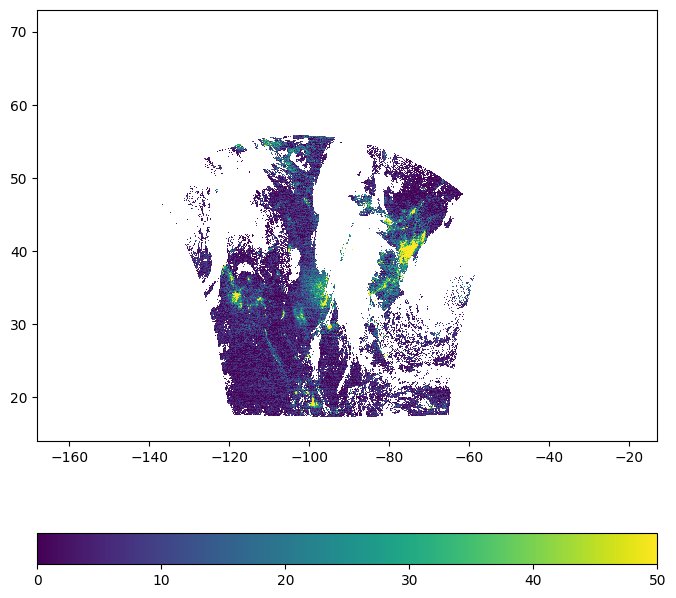

## **Section 4: Plotting Satellite Data on Maps**

The `xarray` package has some [basic built-in plotting functions](https://docs.xarray.dev/en/stable/user-guide/plotting.html) that can be useful for making a quick plot, especially if you are exploring a new satellite dataset. And in Section 3, you learned how to make a simple plot using the `Matplotlib` package.

To make a figure suitable for a presentation or report, however, you will want to plot satellite data on a map using the [cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html) package.

### **4.1 Select a map projection using `cartopy`**

The`cartopy` package has many [map projection options](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html), each with its own strengths and limitations.

Choose a map projection that highlights/emphasizes the satellite data with which you are working. This tutorial demonstrates two different map projections: `Plate Carree` and `Geostationary`.

#### **4.1.1 : Plate Carree map projection**

To make a map, we set up a figure in `Matplotlib` and add `geoaxes` with a map projection using `cartopy`.

The first example of a map projection is the [Plate Carree](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#platecarree) equidistant cylindrical (equirectangular) projection: `projection=ccrs.PlateCarree()`.

We add [coastlines](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) to the map, so we can see how the Earth is represented by this projection. You can ignore the `DownloadWarning` message; the first time you access a [Natural Earth Feature shapefile](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.io.shapereader.natural_earth.html#cartopy.io.shapereader.natural_earth) via `cartopy`, you will see this warning message.

In [ ]:
# Set up figure in matplotlib
fig = plt.figure(figsize=(8, 10))

# Set Plate Carree map projection using cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Show plot
plt.show()

#### **4.1.2 : Geostationary map projection**

When plotting geostationary satellite data, like TEMPO data, many end users prefer to use the native [Geostationary](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#geostationary) projection.

A number of constants are used to define the `geo_projection`:
- TEMPO flies on the Intelsat-40e satellite:
  - `satellite_height`: height of satellite above ellipsoid (Earth)
  - `central_longitude`: longitude where satellite is centered; 91° W
- Ellipsoid (Earth):
  - `semi_major_axis`: semi-major axis of Earth using Geodetic Reference System of 1980 (GRS80); same as for GOES-R ABI data
  - `semi_minor_axis`: semi-minor axis of Earth using Geodetic Reference System of 1980 (GRS80); same as for GOES-R ABI data
  - `inverse_flattening`: reciprocal of Geodetic Reference System of 1980 (GRS80) flattening factor; same as for GOES-R ABI data

In [ ]:
# Define constants for Intelsat-40e geostationary orbit & Earth reference system
satellite_height = 35786023.0  # height of satellite in meters
central_longitude = -91.0  # longitude of satellite in degrees
semi_major_axis = 6378137.0  # GRS80 semi-major axis of earth in meters
semi_minor_axis = 6356752.31414  # GRS80 semi-minor axis of earth in meters
inverse_flattening = 298.257222096  # Reciprocal of GRS80 flattening factor

# Define geostationary map projection using cartopy
globe = ccrs.Globe(semimajor_axis=semi_major_axis, semiminor_axis=semi_minor_axis,
                   inverse_flattening=inverse_flattening)
geo_projection = ccrs.Geostationary(central_longitude=central_longitude,
                                    satellite_height=satellite_height, globe=globe)

In [ ]:
# Set up figure in matplotlib
fig = plt.figure(figsize=(8, 10))

# Set geostationary map projection using cartopy
ax = plt.axes(projection=geo_projection)

# Add coastlines
ax.coastlines()

# Show plot
plt.show()

### **4.2 Set the geographic domain of the map**

Use the `set_extent([bounding_box_corners])` [function](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent) to set the geographic domain of the map, where the `bounding_box_corners` are the `[western_longitude, eastern_longitude, southern_latitude, northern_latitude]` of the zoomed-in domain in degrees; negative values indicate °S latitude or °W longitude.

The argument `crs=ccrs.PlateCarree()` must be used with the `set_extent()` function because we are entering the `bounding_box_corners` in geographic coordinates (latitude and longitude).

Let's zoom into the TEMPO field of regard (FOR) with the `geostationary` map projection. As before, you can ignore the `DownloadWarning` message related to downloading the Natural Earth Feature shapefile via `cartopy`.

In [ ]:
# Set up figure in matplotlib
fig = plt.figure(figsize=(8, 10))

# Set geostationary map projection using cartopy
ax = plt.axes(projection=geo_projection)

# Set geographic domain of map: [W_lon, E_lon, S_lat, N_lat]
# °E longitude > 0 > °W longitude, °N latitude > 0 > °S latitude
ax.set_extent([-121, -64, 17, 59], crs=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Show plot
plt.show()

### **4.3 Add borders and shade land & water polygons**

The `cartopy` package has a number of options for adding borders to a map.  We've already seen how to add `coastlines()`. For more control over borders as well as land & water polygons, use the `cartopy` [Feature interface](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html), which defines seven common features.

The Feature Interface borders plot as black lines with `linewidth=1` by default. You can modify the default Features interface settings to change the color and/or width of the coastlines and borderlines, and to shade land, ocean, and lakes polygons using `Matplotlib` [built-in named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).  

Working with our TEMPO FOR `geostationary` projection map, let's add coastlines, international borders, US state & Canada province borders, and large lakes from the Features interface. And let's color the ocean and lakes `facecolor='lightblue'` and the land `facecolor='wheat'`, and change the widths of the coast/border lines.

As before, you can ignore the `DownloadWarning` messages related to downloading Natural Earth Feature shapefiles via `cartopy`.

In [ ]:
# Set up figure in matplotlib
fig = plt.figure(figsize=(8, 10))

# Set geostationary map projection using cartopy
ax = plt.axes(projection=geo_projection)

# Set geographic domain of map: [W_lon, E_lon, S_lat, N_lat]
# °E longitude > 0 > °W longitude, °N latitude > 0 > °S latitude
ax.set_extent([-121, -64, 17, 59], crs=ccrs.PlateCarree())

# Add coastlines & borders, shade land & water polygons
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.STATES, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='wheat')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Show plot
plt.show()

### **4.4 Add latitude/longitude gridlines & labels using `cartopy`**

Latitude and longitude gridlines and labels can be added using the `cartopy` [gridlines function](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines), conventionally abbreviated as `gl`. Examples of how to apply the gridlines settings are shown in [cartopy's gridlines tutorial](https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html).

The appearance of gridlines and labels will be different for different map projections. The easiest approach is to begin with the default settings to add gridlines and labels `gl=ax.gridlines(draw_labels=True)`, and then use parameters in the `gridlines()` function  to customize the grid labels and the gridlines.

Let's see how to:
- Add `'navy'` colored dashed gridlines with `linewidth=0.5`
- Set tick mark intervals `lon_ticks` and `lat_ticks` for the latitude/longitude grid
- Assign the locations of the gridlines using the `matplotlib` `ticker.FixedLocator()` [function](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FixedLocator)
- Remove the labels along the bottom and right sides of map
- Make the `'size'` of the labels smaller (8-point font).

In [ ]:
# Set up figure in matplotlib
fig = plt.figure(figsize=(8, 10))

# Set geostationary map projection using cartopy
ax = plt.axes(projection=geo_projection)

# Set geographic domain of map: [W_lon, E_lon, S_lat, N_lat]
# °E longitude > 0 > °W longitude, °N latitude > 0 > °S latitude
ax.set_extent([-121, -64, 17, 59], crs=ccrs.PlateCarree())

# Format lat/lon gridlines using cartopy
lon_ticks = [-120, -100, -80, -60]
lat_ticks = [20, 30, 40, 50]
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='navy', ls='--')
gl.xlocator = ticker.FixedLocator(lon_ticks)
gl.ylocator = ticker.FixedLocator(lat_ticks)
gl.right_labels = False
gl.bottom_labels = False
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# Add coastlines & borders, shade land & water polygons
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.STATES, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='wheat')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Show plot
plt.show()

### **4.5 Pull information from the satellite file name for plot title & name of saved image file**

Next, we're going to plot TEMPO NO2 and VIIRS AOD data on maps. For each map file we make, we could manually assign the text of the plot title and the saved image file name, but that is tedious and prone to error. A better approach is to use the information in a satellite data file name to generate the plot title and file save name automatically.

Let's see how to do this by making a title for a plot of the TEMPO gridded NO2 data. We set the full directory path to the file on the Colab instance using the `pathlib` module.
- Recall from Section 1 that the `pathlib` module uses `/` to join the directory path with the file name to get the full path for the file, e.g., `Path.cwd() / <file_name>`.
- Appending `.name` to a `pathlib` object (e.g., `no2_file.name`) extracts a string representing the final path component, in this case, the file name.

We can extract parts of the satellite data file name using the Python `str.split()` [built-in type](https://docs.python.org/3/library/stdtypes.html#str.split) to split the file name using the `_` delimiter, in conjunction with Python [slicing](https://stackoverflow.com/questions/509211/how-slicing-in-python-works).

For satellite data plot titles, I like to specify the observation date and time. I recommend reformatting the observation date using the `datetime` module's [datetime format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes). This way, we can reformat the date in the satellite file name, which is in **YYYMMDD** format, to something more readable for a plot title, such as **DD Mon YYYY** format (e.g., "13 Nov 2024"); this format avoids any confusion with the order of date abbreviations used in the US (MM/DD) and in Europe (DD/MM).

**Coding Notes:** The text formatting `'$_{2}$'` will appear as a subscripted `2` when we add the plot title with `matplotlib`. Python [f-strings](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) are used to join the defined variables and strings to make the `plot_title`.

In [ ]:
# Set full directory path to file
no2_file = Path.cwd() / 'TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc'

# Print the string representing the final path component
print(no2_file.name)
print(type(no2_file.name))

In [ ]:
# Pull info out of TEMPO file name string, reformat & make plot title automatically
file_date = no2_file.name.split('_')[4][:8]
title_date = datetime.datetime.strptime(file_date, '%Y%m%d').date().strftime('%d %b %Y')
file_time = no2_file.name.split('_')[4][9:13]
scan = no2_file.name.split('_')[5][1:4]
plot_title = (f'TEMPO Tropospheric Column NO$_{2}$  {title_date}  Scan {scan}'
              f'  {file_time} UTC')

# Print the automatically generated plot title (to check)
print(plot_title)

### **4.6 Putting it all together: Plot processed TEMPO NO2 on a map**

The code below builds on concepts presented previously in the tutorial to make a professional-looking plot of processed TEMPO gridded (L3) NO2 data on a map.

**There is always more than one way to do something with Python!** The code below presents a different approach than Section 3 for three aspects of the data analysis/plotting:

1. The extra `time` dimension for variables in the `product` and `support_data` groups is removed using the `xarray.DataArray.squeeze` [function](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.squeeze.html) instead of the `xarray.DataArray.isel` [function](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.isel.html#xarray.DataArray.isel).
2. The processed TEMPO NO2 data (`processed_no2`) are multiplied by 1x10E-15 and plotted on a scale of 0-10 to conform with the convention for displaying satellite NO2 data.
3. The `latitude` and `longitude` 1-D arrays are used directly in the `matplotlib` `pyplot.pcolormesh()` [plotting function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) without converting them to 2-D arrays using the `numpy.meshgrid` [function](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
  - `pcolormesh` can handle its `X` and `Y` input arrays (i.e., `latitude` and `longitude`) as 1-D arrays
  - If `X` and/or `Y` are 1-D arrays or column vectors they will be expanded as needed into the appropriate 2-D arrays, making a rectangular grid
---
**Additional notes on the map plotting code:**

We open the data file utilizing the Python `with` [statement](https://www.geeksforgeeks.org/with-statement-in-python/), which automatically closes the file when we're done with it.

I changed the colors of the gridlines and land & water polygons to provide a neutral background for the plotted satellite data.

 For plotting NO2 data, select any of the sequential colormaps from the `matplotlib` [built-in colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Note that adding `_r` to the end of any colormap name reverses it (e.g., `'plasma_r'`). We [set a unique color for data > vmax](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap.with_extremes)  using the `matplotlib` [built-in named colors](https://matplotlib.org/stable/gallery/color/named_colors.html). This highlights areas on the map with high NO2.

The `matplotlib` `pyplot.pcolormesh()` [plotting function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) argument `transform=ccrs.PlateCarree()` tells `cartopy` that the plotted satellite data are in geographic coordinates (lat/lon). This argument **must** be included when plotting satellite data that are in geographic coordinates, or the data will not plot correctly on the map projection.

We add a colorbar and format it using the `matplotlib.colorbar.colorbar()` [function](https://matplotlib.org/stable/api/colorbar_api.html).

We save the map image plot to the Colab instance using the the `matplotlib` `fig.savefig()` [function](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig).

- Change the resolution of the saved image file using the `dpi=` argument in `fig.savefig()`. The higher the dpi, the higher the figure resolution, but the larger the file size and the longer it will take to save the file. The default is  `dpi=100`. I typically use `dpi=300` for general use (e.g., posting images on social media). Try `dpi=600` for presentations and `dpi=1000` for journal articles.
- I recommend setting `bbox_inches='tight'` to minimize empty space around the figure (to zoom in "tight" on the plot).

In [ ]:
# Process & plot tropospheric TEMPO L3 NO2 on a geostationary map projection

# Set full directory path to file
no2_file = Path.cwd() / 'TEMPO_NO2_L3_V03_20241113T182249Z_S009.nc'

# Open file using xarray datatree (automatically closes file when done)
with xr.open_datatree(no2_file, engine='netcdf4') as dt:

  # Read in & process tropospheric NO2 using quality/diagnostic flags
  # "dataarray.squeeze()" removes "time" dimension & converts 3D arrays to 2D
  trop_no2 = dt['/product/vertical_column_troposphere'].squeeze(dim='time')
  main_data_qf = dt['/product/main_data_quality_flag'].squeeze(dim='time')
  eff_cloud_frac = dt['/support_data/eff_cloud_fraction'].squeeze(dim='time')
  processed_no2 = trop_no2.where((main_data_qf == 0) & (eff_cloud_frac < 0.2))

  # Scale NO2 by factor of 1x10E15 (for plotting)
  processed_no2 = processed_no2*1.0E-15

  # Read in latitude and longitude
  longitude = dt['longitude']
  latitude = dt['latitude']

  # Set up figure in matplotlib
  fig = plt.figure(figsize=(8, 10))

  # Set map projection using cartopy
  # Use TEMPO's geostationary projection
  ax = plt.axes(projection=geo_projection)

  # Set geographic domain of map: [W_lon, E_lon, S_lat, N_lat]
  # °E longitude > 0 > °W longitude, °N latitude > 0 > °S latitude
  ax.set_extent([-121, -64, 17, 59], crs=ccrs.PlateCarree())

  # Format lat/lon gridlines using cartopy
  lon_ticks = [-120, -100, -80, -60]
  lat_ticks = [20, 30, 40, 50]
  gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='silver')
  gl.xlocator = ticker.FixedLocator(lon_ticks)
  gl.ylocator = ticker.FixedLocator(lat_ticks)
  gl.right_labels = False
  gl.bottom_labels = False
  gl.xlabel_style = {'size': 8}
  gl.ylabel_style = {'size': 8}

  # Add coastlines & borders, shade land & water polygons
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.LAKES, facecolor='lightgrey')
  ax.add_feature(cfeature.STATES, linewidth=0.25)
  ax.add_feature(cfeature.LAND, facecolor='grey')
  ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')

  # Format & add plot title
  # Pull information from file name string & reformat
  file_date = no2_file.name.split('_')[4][:8]
  title_date = datetime.datetime.strptime(file_date, '%Y%m%d').date().strftime('%d %b %Y')
  file_time = no2_file.name.split('_')[4][9:13]
  scan = no2_file.name.split('_')[5][1:4]
  plot_title = (f'TEMPO Tropospheric Column NO$_{2}$  {title_date}  Scan {scan}'
                f'  {file_time} UTC')
  plt.title(plot_title, pad=10, size=8, weight='bold')

  # Set colormap with unique color for data > vmax
  cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

  # Plot tropospheric NO2 data
  # "transform=ccrs.PlateCarree()" argument needed b/c data are in geographic coordinates (lat/lon)
  plot = ax.pcolormesh(longitude, latitude, processed_no2, cmap=cmap, vmin=0,
                       vmax=10, transform=ccrs.PlateCarree())

  # Add colorbar
  cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.02,
                    shrink=0.5, ticks=[0, 2, 4, 6, 8, 10], extend='max')
  cb.set_label(label='Tropospheric Column NO$_{2}$ (10$\mathregular{^{15}}$ cm$\mathregular{^{-2}}$)',
                size=8, weight='bold')

  # Show plot
  plt.show()

  # Save image file
  save_name = f'tempo_tropospheric_no2_{file_date}_scan{scan}_{file_time}'
  fig.savefig(Path.cwd() / save_name, dpi=300, bbox_inches='tight')

  # Close plot
  plt.close()

##### <b><font color="blue" size="5">Exercise 4-1: Plot NOAA-20 VIIRS gridded AOD data on global map</b></font>

In the empty block below, write the code to plot NOAA-20 VIIRS gridded AOD data on a global map with a Plate Carree map projection. Use the code to plot processed TEMPO gridded NO2 data as a starting point.

**Hints:**
- Review Section 2 to see how you opened the AOD file, and what the contents are.
  - Are there any groups in this file?
- You will need to extract the `AOD550`, `lon`, and `lat` variables.
- No processing of the `AOD550` data is required! The file was generated using high quality AOD data.
-  For a Plate Carree map projection, set `projection=ccrs.PlateCarree()`
- For a global domain, use:
  - `ax.set_extent([180, -180, -90, 90], crs=ccrs.PlateCarree())`
  - `lon_ticks = [0, 60, 120, 180, -180, -120, -60]`
  - `lat_ticks = [-60, -30, 0, 30, 60]`
- Plot AOD data with a range of `vmin=0` and `vmax=1`.
- Select a sequential colormap and set a unique color for AOD >1.





In [ ]:
# Plot VIIRS gridded AOD on a Plate Carree map projection



<details><summary><b><font color="blue" size=5>An answer for Exercise 4-1</font></b></summary>
<p></p>

```
# Plot VIIRS gridded AOD on a Plate Carree map projection

# Set full directory path to file
aod_file = Path.cwd() / 'viirs_eps_noaa20_aod_0.250_deg_20200821.nc'

# Open file using xarray dataset (automatically closes file when done)
with xr.open_dataset(aod_file, engine='netcdf4') as ds:

  # Read in AOD550, latitude, and longitude
  aod = ds['AOD550']
  lon = ds['lon']
  lat = ds['lat']

  # Set up figure in matplotlib
  fig = plt.figure(figsize=(8, 10))

  # Set map projection using cartopy
  # Use Plate Carree projection
  ax = plt.axes(projection=ccrs.PlateCarree())

  # Set geographic domain of map: [W_lon, E_lon, S_lat, N_lat]
  # °E longitude > 0 > °W longitude, °N latitude > 0 > °S latitude
  ax.set_extent([180, -180, -90, 90], crs=ccrs.PlateCarree())

  # Format lat/lon gridlines using cartopy
  lon_ticks = [0, 60, 120, 180, -180, -120, -60]
  lat_ticks = [-60, -30, 0, 30, 60]
  gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='silver')
  gl.xlocator = ticker.FixedLocator(lon_ticks)
  gl.ylocator = ticker.FixedLocator(lat_ticks)
  gl.right_labels = False
  gl.top_labels = False
  gl.xlabel_style = {'size': 8}
  gl.ylabel_style = {'size': 8}

  # Add coastlines & borders, shade land & water polygons
  ax.add_feature(cfeature.COASTLINE, linewidth=0.75)
  ax.add_feature(cfeature.BORDERS, linewidth=0.75)
  ax.add_feature(cfeature.LAKES, facecolor='lightgrey')
  ax.add_feature(cfeature.STATES, linewidth=0.5)
  ax.add_feature(cfeature.LAND, facecolor='grey')
  ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')

  # Format & add plot title
  # Pull information from file name & reformat
  satellite = aod_file.name.split('_')[2]
  if satellite == 'npp':
      satellite_name = 'SNPP'
  elif satellite == 'noaa20':
      satellite_name = 'NOAA-20'
  resolution = aod_file.name.split('_')[4][:4]
  file_date = aod_file.name.split('_')[6][:8]
  title_date = datetime.datetime.strptime(file_date, '%Y%m%d').date().strftime('%d %b %Y')
  plot_title = (f'{satellite_name}/VIIRS Aerosol Optical Depth ({resolution}\N{DEGREE SIGN} resolution)'
                f'  {title_date}')
  plt.title(plot_title, pad=10, size=8, weight='bold')

  # Set colormap with unique color for data > vmax
  cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

  # Plot VIIRS AOD data
  # "transform=ccrs.PlateCarree()" argument needed b/c data are in geographic coordinates (lat/lon)
  plot = ax.pcolormesh(lon, lat, aod, cmap=cmap, vmin=0, vmax=1,
                       transform=ccrs.PlateCarree())

  # Add colorbar
  cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05,
                    shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
  cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')

  # Show plot
  plt.show()

  # Save image file
  save_name = f'{satellite}_viirs_aod_gridded_{file_date}'
  fig.savefig(Path.cwd() / save_name, dpi=300, bbox_inches='tight')

  # Close plot
  plt.close()
```

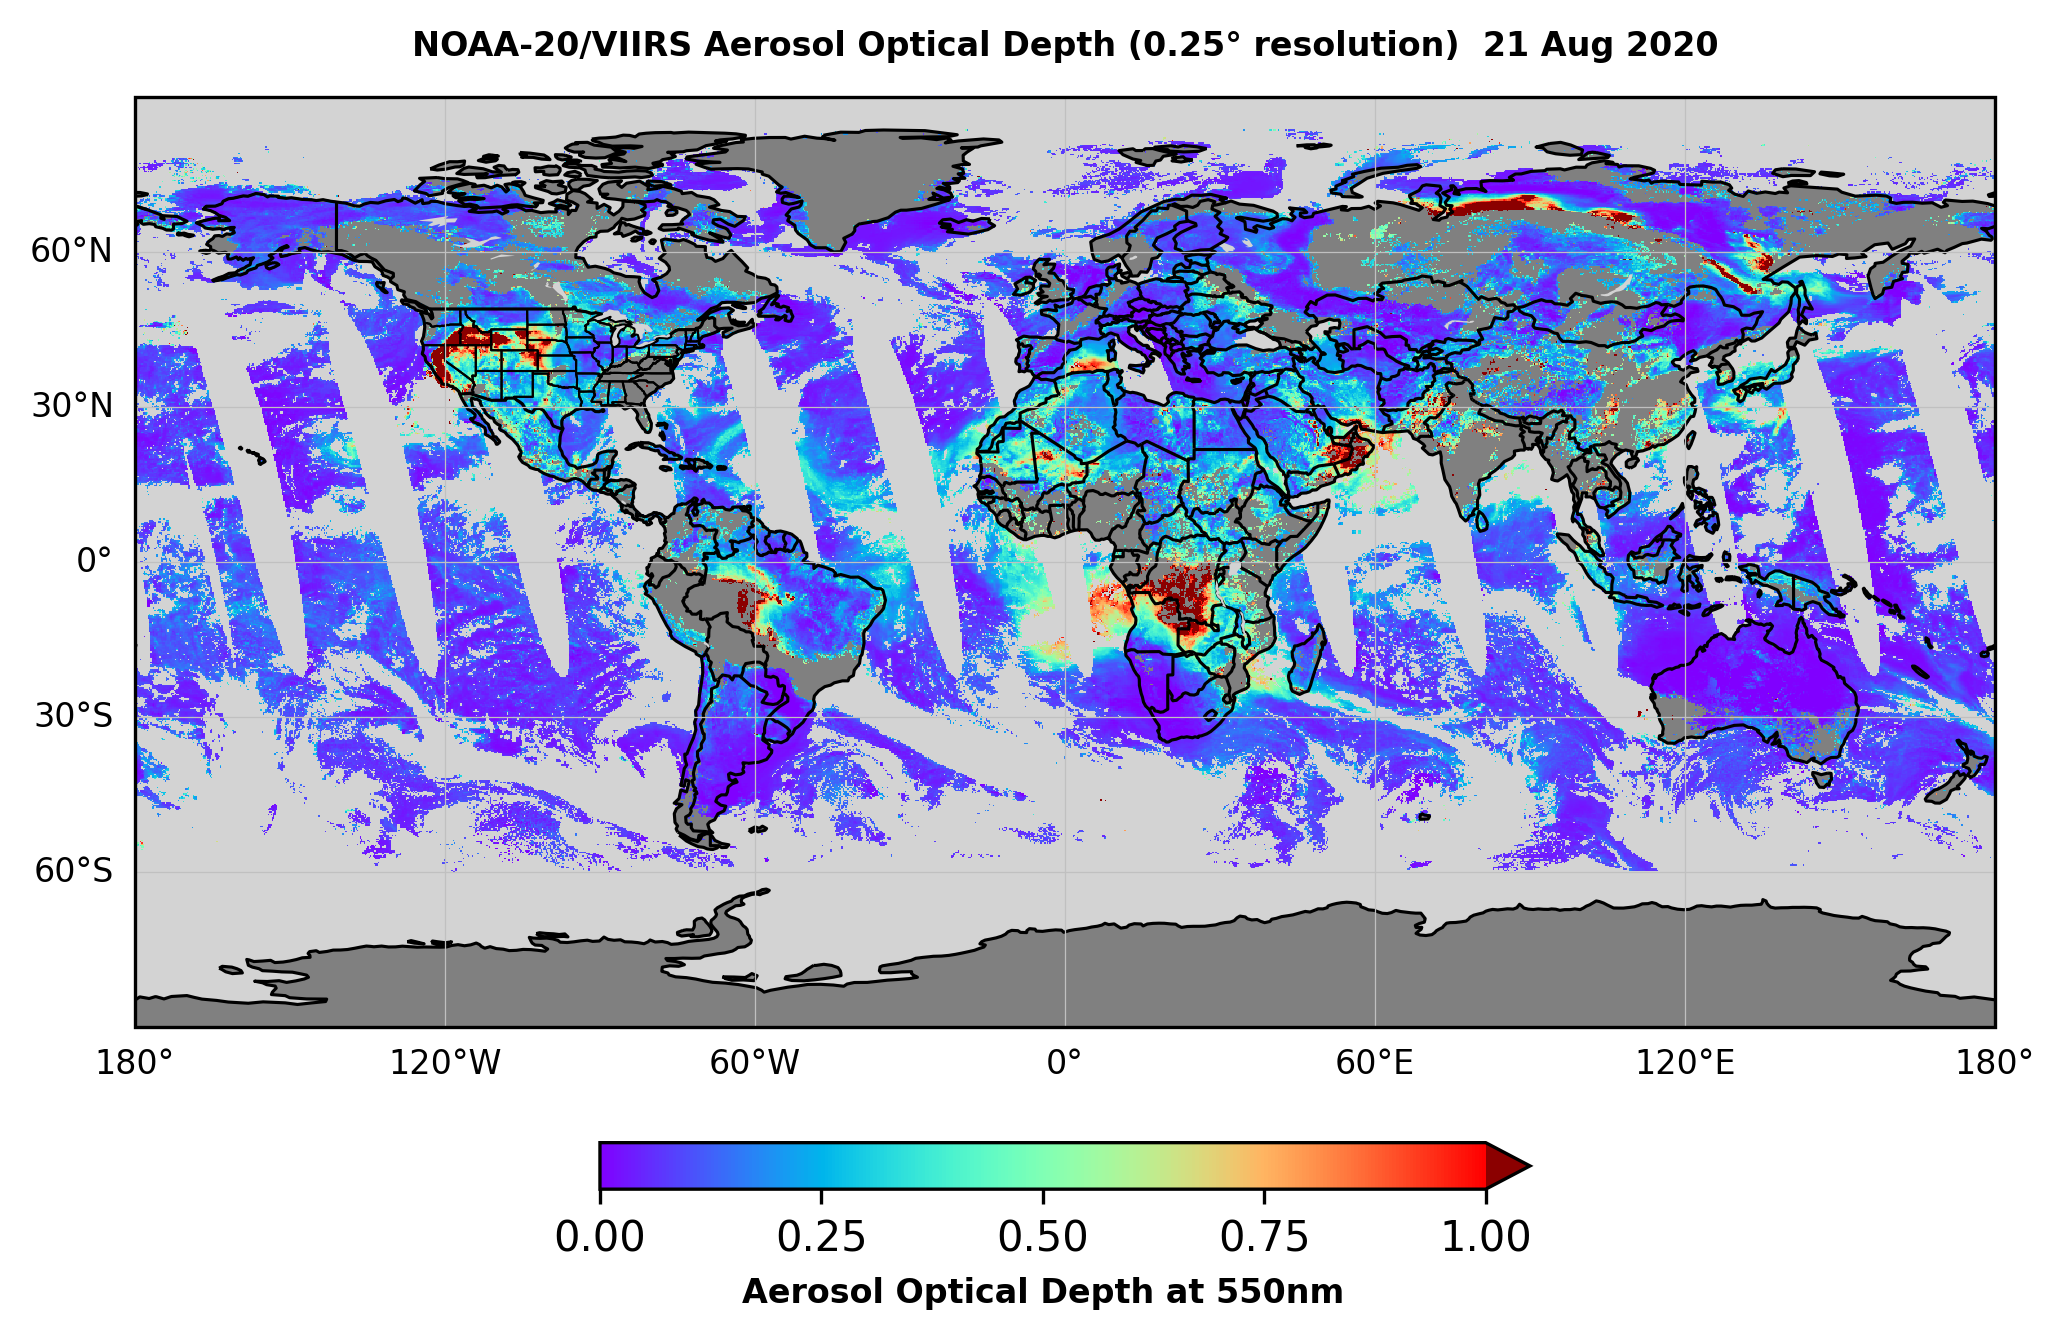



## **Next Steps**

- Try going through Sections 1-4 for your satellite data product of choice. **Don't forget to start by finding & reading the product documentation provided by the science team!**
  - Make your own Colab notebook(s) and tinker with the provided code for your product of choice.
  - You can make as many Colab notebooks as you want, so get coding!

- If you are serious about using Python for satellite data, we encourage you to [download and install the Anaconda software package](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/software_anaconda_install.php) to run Python on your computer.

- If you have questions about a satellite product, like what online data archive to use, or how to process or display the data correctly:
 - Try an online search first (all Pythonistas Google all the time)
 - Don't hesitate to contact the science team - most scientists love to hear from users and answer questions!
 - Feel free to contact Rebekah & Amy - but only with questions pertinent to the training please!

- Check out our inaugural [Python in the Atmospheric Sciences elightning session (A53AA)](https://agu.confex.com/agu/agu24/meetingapp.cgi/Session/240012) on Friday at 2:10 pm in eLightning Theater 1 (Convention Center).
- If you're interested in reviewing the second edition of Rebekah's book, [Earth Observations using Python](https://www.wiley.com/en-us/Earth+Observation+Using+Python%3A+A+Practical+Programming+Guide-p-9781119606918), please email her at rebekah.esmaili@gmail.com.